# Evaluation of Results

In the following we showcase some of our results. We tried different Network Architecutures with different parameters and settings.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
from scipy.interpolate import interp1d

In [3]:
#Simple Moving Average (SMA) to flatten curves and to identify trends
def maverage(values, window):
    weights = np.repeat(1.0, window)/window
    return np.convolve(values, weights, 'valid')

### Feed Forward Neural Network
Different Agents with the same 64x64-FFNN-Architecture

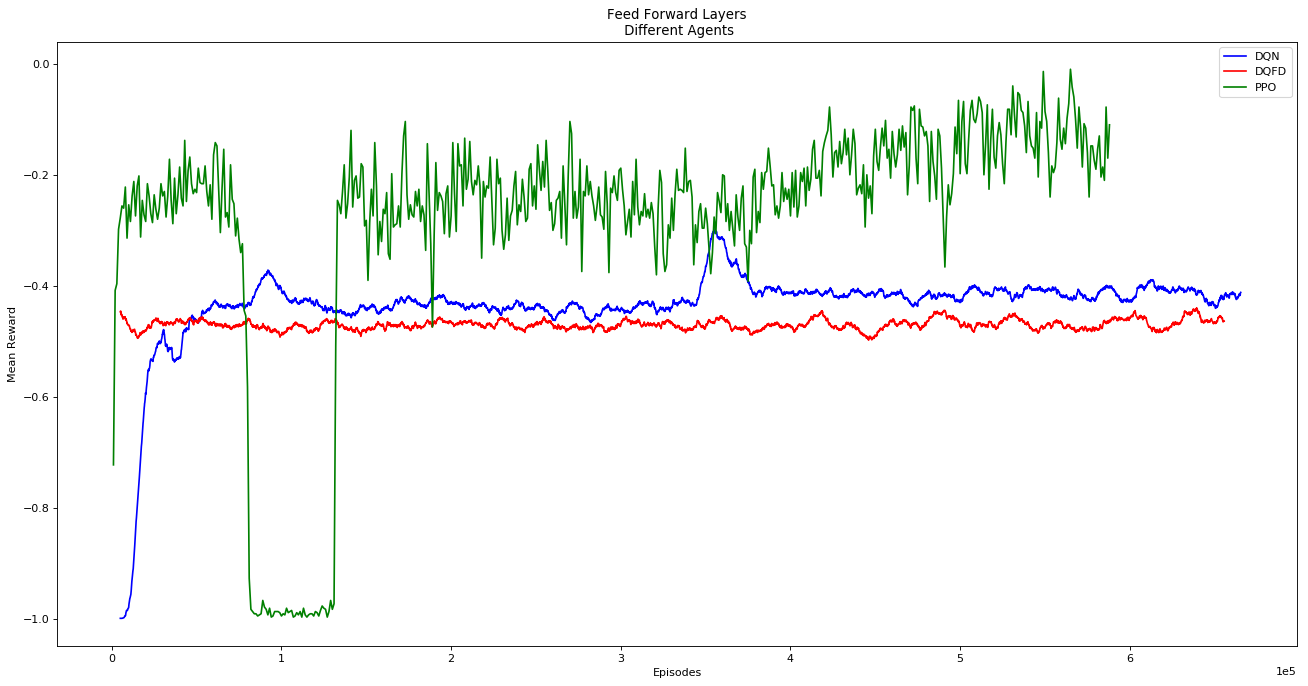

In [4]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

Averaging=True
Interpolation=False

df1 = pd.read_csv('log_dqn_1m.csv')
df2 = pd.read_csv('log_dqfd_1m.csv')
df3 = pd.read_csv('log_ppo_500k.csv')

ep1, ep2, ep3 = df1['episodes'], df2['episodes'], df3['Timestep']
re1, re2, re3  = df1['mean reward'], df2['mean reward'], df3['Mean']

#Averaging
if Averaging:
    wdw = 100
    ep1, ep2, ep3 = maverage(ep1, wdw), maverage(ep2, wdw), maverage(ep3, 1)
    re1, re2, re3 = maverage(re1, wdw), maverage(re2, wdw), maverage(re3, 1)

#Interpolation
if Interpolation:
    num = 1e2
    f1 = interp1d(ep1, re1)
    f2 = interp1d(ep2, re2)
    f3 = interp1d(ep3, re3)

    ep1 = np.linspace(ep1.min(), ep1.max(), num=num, endpoint=True)
    ep2 = np.linspace(ep2.min(), ep2.max(), num=num, endpoint=True)
    ep3 = np.linspace(ep3.min(), ep3.max(), num=num, endpoint=True)

    re1 = f1(ep1)
    re2 = f2(ep2)
    re3 = f3(ep3)


#Plot the Graph
#plt.figure(1)
plt.plot(ep1, re1, 'b', ep2, re2, 'r', ep3, re3, 'g')

#Additional Settings
#plt.ylim(-1, 1)
#plt.xscale('log')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(['DQN', 'DQFD', 'PPO'], loc='best')
plt.xlabel('Episodes'), plt.ylabel('Mean Reward')
plt.title('Feed Forward Layers\n Different Agents')
plt.savefig('images/ffnn.png', dpi=96, bbox_inches='tight')
plt.show()

### Feed Forward Neural Network vs. Convolutional Layers


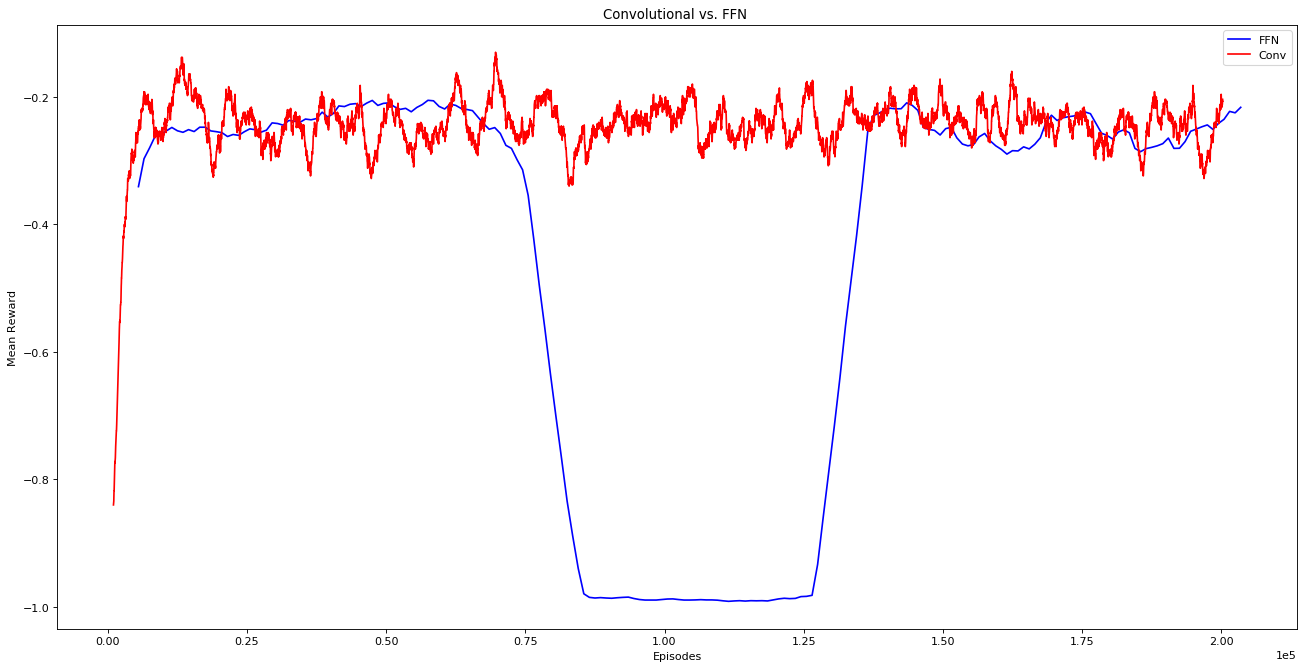

In [84]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

Averaging=True
Interpolation=False

df1 = pd.read_csv('log_ppo_500kc.csv')
df2 = pd.read_csv('log_conv_ppo_lre3c.csv')


ep1, ep2  = df1['Timestep'], df2['episodes']
re1, re2  = df1['Mean'], df2['mean reward']

#Averaging
if Averaging:
    wdw = 100
    ep1, ep2 = maverage(ep1, 10), maverage(ep2, wdw)
    re1, re2 = maverage(re1, 10), maverage(re2, wdw)


#Interpolation
if Interpolation:
    num = 1e2
    f1 = interp1d(ep1, re1)
    f2 = interp1d(ep2, re2)

    ep1 = np.linspace(ep1.min(), ep1.max(), num=num, endpoint=True)
    ep2 = np.linspace(ep2.min(), ep2.max(), num=num, endpoint=True)

    re1 = f1(ep1)
    re2 = f2(ep2)

#Plot the Graph

plt.plot(ep1, re1, 'b', ep2, re2, 'r')

#Additional Settings
#plt.ylim(-1, 1)
#plt.xscale('log')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(['FFN', 'Conv'], loc='best')
plt.xlabel('Episodes'), plt.ylabel('Mean Reward')
plt.title('Convolutional vs. FFN ')
plt.savefig('images/conv_ffnn.png', dpi=96, bbox_inches='tight')
plt.show()

### Convolutional Layers - Learning rate

PPO Agent, different learning rates

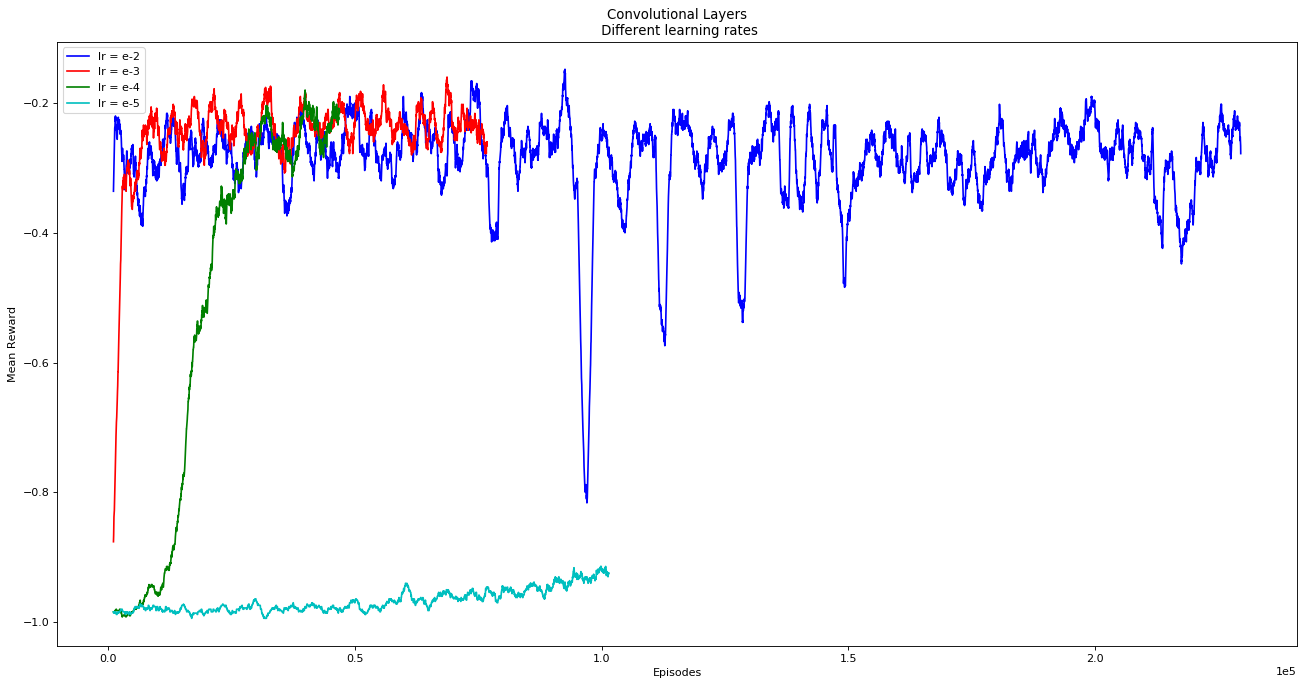

In [6]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

Averaging=True
Interpolation=False

df1 = pd.read_csv('log_conv_ppo_lre2.csv')
df2 = pd.read_csv('log_conv_ppo_lre3-vanilla-lre3.csv')
df3 = pd.read_csv('log_conv_ppo_lre4.csv')
df4 = pd.read_csv('log_conv_ppo_lre5.csv')

ep1, ep2, ep3, ep4 = df1['episodes'], df2['episodes'], df3['episodes'], df4['episodes']
re1, re2, re3, re4  = df1['mean reward'], df2['mean reward'], df3['mean reward'], df4['mean reward']


#Averaging
if Averaging:
    wdw = 100
    ep1, ep2, ep3, ep4 = maverage(ep1, wdw), maverage(ep2, wdw), maverage(ep3, wdw), maverage(ep4, wdw)
    re1, re2, re3, re4 = maverage(re1, wdw), maverage(re2, wdw), maverage(re3, wdw), maverage(re4, wdw)


#Interpolation
if Interpolation:
    num = 1e2
    f1 = interp1d(ep1, re1)
    f2 = interp1d(ep2, re2)
    f3 = interp1d(ep3, re3)
    f4 = interp1d(ep4, re4)

    ep1 = np.linspace(ep1.min(), ep1.max(), num=num, endpoint=True)
    ep2 = np.linspace(ep2.min(), ep2.max(), num=num, endpoint=True)
    ep3 = np.linspace(ep3.min(), ep3.max(), num=num, endpoint=True)
    ep4 = np.linspace(ep4.min(), ep4.max(), num=num, endpoint=True)

    re1 = f1(ep1)
    re2 = f2(ep2)
    re3 = f3(ep3)
    re4 = f4(ep4)


#Plot the Graph
plt.plot(ep1, re1, 'b', ep2, re2, 'r', ep3, re3, 'g', ep4, re4,'c')

#Additional Settings
#plt.ylim(-1, 1)
#plt.xscale('log')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(['lr = e-2', 'lr = e-3','lr = e-4', 'lr = e-5'], loc='best')
plt.xlabel('Episodes'), plt.ylabel('Mean Reward')
plt.title('Convolutional Layers\n Different learning rates')
plt.savefig('images/conv_lr.png', dpi=96, bbox_inches='tight')
plt.show()

### Convolutional Layers - Centering 
Same Convolutional Architecture - Centering vs no Centering

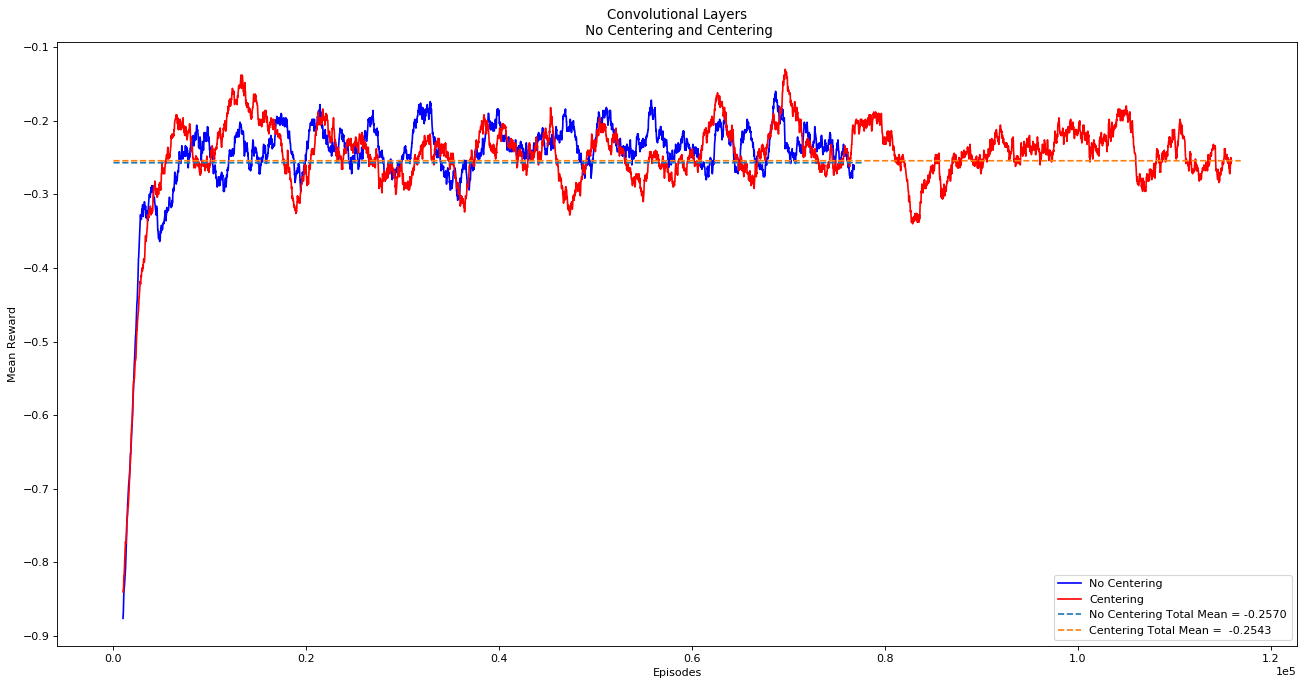

In [64]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

Averaging=True
Interpolation=False

df1 = pd.read_csv('log_conv_ppo_lre3-vanilla-lre3.csv')
df2 = pd.read_csv('log_conv_ppo_center_lre3.csv')

ep1, ep2  = df1['episodes'], df2['episodes']
re1, re2  = df1['mean reward'], df2['mean reward']


re1_mean = [np.mean(re1)]*len(ep1)
re2_mean = [np.mean(re2)]*len(ep2) 

lep1 = ep1
lep2 = ep2



#Averaging
if Averaging:
    wdw = 100
    ep1, ep2 = maverage(ep1, wdw), maverage(ep2, wdw)
    re1, re2 = maverage(re1, wdw), maverage(re2, wdw)

#Interpolation
if Interpolation:
    num = 1e2
    f1 = interp1d(ep1, re1)
    f2 = interp1d(ep2, re2)

    ep1 = np.linspace(ep1.min(), ep1.max(), num=num, endpoint=True)
    ep2 = np.linspace(ep2.min(), ep2.max(), num=num, endpoint=True)

    re1 = f1(ep1)
    re2 = f2(ep2)
    
#Plot the Graph
plt.plot(ep1, re1, 'b', ep2, re2, 'r', lep1, re1_mean, '--', lep2, re2_mean, '--' )

#Additional Settings
#plt.ylim(-1, 1)
#plt.xscale('log')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))    
plt.legend(['No Centering', 'Centering', 'No Centering Total Mean = -0.2570', 'Centering Total Mean =  -0.2543'], loc='best')
plt.xlabel('Episodes'), plt.ylabel('Mean Reward')

plt.title('Convolutional Layers\n No Centering and Centering')
plt.savefig('images/conv_cent.png', dpi=96, bbox_inches='tight')
plt.show()